# TPM034A Machine Learning for socio-technical systems 
## `Assignment 02: MultiLayer Perceptrons`

**Delft University of Technology**<br>
**Q2 2023**<br>
**Instructor:** Sander van Cranenburgh <br>
**TAs:**  Francisco Garrido Valenzuela & Lucas Spierenburg <br>

### `Instructions`

**Assignments aim to:**<br>
* Examine your understanding of the key concepts and techniques.
* Examine your the applied ML skills.

**Assignments:**<br>
* Are graded and must be submitted (see the submission instruction below). 

### `Workspace set-up`

**Option 1: Local environment**<br>
Uncomment the following cell if you are running this notebook on your local environment. This will install all dependencies on your Python version.

In [1]:
#!pip install -r requirements.txt

**Option 2: Google Colab**<br>
Uncomment the following cells code lines if you are running this notebook on Colab

In [2]:
#!git clone https://github.com/TPM034A/Q2_2023
#!pip install -r Q2_2023/requirements_colab.txt
#!mv "/content/Q2_2023/Assignments/assignment_02/data" /content/data


## `Application: Predicting the effects of a Cordon pricing policy in the city centre of Leeds` <br>

### **Introduction**
The city of Leeds, in the United Kingdom, is considering implementing a cordon pricing policy on private cars in the city center. Such a policy involves charging a fixed amount per trip going in or out of a perimeter, usually the city center. Nowadays, car-free city centres are increasingly popular in Western-European countries. As cars produce various negative externalities, including traffic accidents, air pollution, and noise pollution, a cordon pricing policy has the potential to make the city centre more attractive and a better place to live and do business. 

Your assignment is to inform the decision-makers in Leeds about the effects of a cordon pricing policy. Specifically, the city of Leeds does not yet know the extent to which higher cordon pricing would shift the mode shares of trips going to the city centre. This information is vital to assess the viability and effectiveness of the cordon pricing policy under consideration.

To inform the decision-makers in Leeds, in this assignment you will:
1. Create a model that predicts the mode choices, given a set of travel characteristics. Specifically, you will train a MultiLayer Perceptron (MLP) based on observed travel patterns. 
2. Use your trained model to predict the effect of the cordon pricing policy on mode shares for trips going to the city centre.<br>

### **Data**

You have access to three data sets:
1. Travel patterns and modes choice data. These data are obtained from a so-called revealed-preference survey, see a description of this data [here](https://link.springer.com/article/10.1007/s11116-018-9858-7)
1. Zones of Leeds (GIS)
1. Mode shares per zone in Leeds, derived from the two other datasets.
<br>

`IMPORTANT`<br>
These data are exclusively made available by its owners for **educational purposes**.<br> 
You are **NOT** allowed to **share or further distribute** these data with anyone other than those involved in TPM034A.

### **Notes**
- The description of each column of revealed-preference dataset is [here](data/model_average_RP_description.pdf)
- In revealed-preference dataset considers as *numerical travel features*: 'avail_car', 'avail_taxi', 'avail_bus' 'avail_rail', 'avail_cycling', 'avail_walking', 'total_car_cost', 'taxi_cost', 'bus_cost_total_per_leg', 'rail_cost_total_per_leg', 'car_distance_km', 'bus_distance_km', 'rail_distance_km', 'taxi_distance_km' 'cycling_distance_km', 'walking_distance_km', 'car_travel_time_min', 'bus_travel_time_min', 'rail_travel_time_min', 'taxi_travel_time_min', 'cycling_travel_time_min', 'walking_travel_time_min' 'bus_IVT_time_min', 'bus_access_egress_time_min', 'rail_IVT_time_min', 'rail_access_egress_time_min' 'bus_transfers', 'rail_transfers'.
- Each row in the zone dataset (2nd dataset) corresponds to an individual zone in Leeds, and contains 4 different columns. The description of each column is shown in the following able:


| Column   | Description                                                                                                                                                                                                  |
|----------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| LSOA11CD | Zone Code                                                                                                                                                                                                    |
| LSOA11NM | Zone Name                                                                                                                                                                                                    |
| Region   | Region Code, corresponds to a bigger region formed by a set of zones. Values = {'C': Center region, 'R': Ring center region, 'NW': North-West region, 'NE': North-East , 'SW': South-West, 'SE': South-East}  |
| geometry | Polygonal geometry of each zone                                                                                                                                                                              |


### **Tasks and grading**

Your assignment is divided into 4 subtasks: (1) Data preparation, (2) Data exploration, (3) Model training, and (4) Assessment of the impact of the cordon pricing policy on mode shares. In total, 10 points can be earned in this assignment. The weight per subtask is shown below. 

1.  **Data preparation: Load datasets and make a first inspection** [1 pnt]
    1. Load the two dataset using Pandas and GeoPandas.
    1. Check the structure of both datasets e.g. using `df.head()` or `df.describe()`.
    1. Handle the NaN values. I.e. only keep only trips where the **destination** is known.
    1. Create a map that shows the six regions of Leeds (C, R, NW, NE, SW, SE) in separate colors.
1. **Data exploration: discover and visualise mobility patterns.** [3 pnt] 
    1. For each zone, count the number of times that a zone is a destination (hint: use the pandas *groupby* method). Create a visualisation showing the statistical distribution of these counts, using a histogram. What can you say about this distribution? 
    1. Visualise the spatial distribution of these counts. To do so, merge this count dataframe with the geographic delination of zones (thus, geospatial data). The counts are heavily skewed. Therefore, try different levels of the upper boundary of the color scale (vmax), and set it to an appropriate level.
1. **Model training: Train a MLP to predict the choices** [3 pnt]
    1. Use the *numerical travel features* (see notes above) and the following two categorical features: purpose and destination regions. Remember: (1) to scale all variables appropriately before training your MLP, and (2) to encode categorical variables.  (hint: use the pandas **get_dummies** method to encode the categorical variables).
    1. Tune the hyperparameters of your MLP. That is, do a gridsearch over the following hyperparameter space:
        - Architecture: {1 HL w/30 nodes, 2 HL w/ 5 nodes}
        - Alpha parameter: {1, 0.1}
        - Learning rate: {0.01, 0.001}
    1. Fit an MLP model, using the optimal hyperparameters found and report and interpret the following output metrics:
        - accuracy
        - cross-entropy
        - confusion matrix.
1. **Assess the impact of a cordon pricing policy on mode shares** [3 pnt]
    1. Benchmark scenario: Create a new dataframe containing only trips with a destination in region C (the city centre). Predict the mode shares for these trips, using your trained model. Use the *predict_proba* function from sk-learn, why should you NOT use the *predict* function in this case?
    1.  Cordon pricing policy: in the dataset created in 4.1, increase `total_car_cost` and `taxi_cost` with £10. Use your trained model to predict the new mode shares. (**Remember to scale the data with the scaler created for training the model**).
    1. Compare your results. That is, analyse how mode shares have changed as a result of the cordon pricing policy. Create a visualisation representing the shift in mode shares. By which mode have car trips most often been substituted?
    1. Reflect on your analysis. Do you think your analysis are meaningful? Why/why not? What is the main limitation of your analysis?


### **Submission**
- The deadline for this assignment is **30 November 2023 23:59** 
- Use **Python 3.10 or above**
- You have to submit your work in zip file with the ipynb **(fully executed)**

### 1. Data preparation: Load datasets and make a first inspection [1 pnt]
#### 1.1. Load the two dataset using Pandas and GeoPandas

In [4]:
#Set data folder and loads the data with pandas and geo pandas
working_folder = getcwd()
data_folder = Path(f'data')

data = pd.read_csv(data_folder/"RP_mode_choice_data.csv")
zones = gpd.read_file(data_folder/"mode_shares_per_zones.gpkg")


#### 1.2. Check the structure of both datasets e.g. using `df.head()` or `df.describe()`.

In [5]:
display(data.head())
display(data.describe())
display(zones.head())
display(zones.describe())

,ID,purpose,n_car,n_bicycle,n_motorcycle,avail_car,avail_taxi,avail_bus,avail_rail,avail_cycling,avail_walking,total_car_cost,taxi_cost,day_of_the_week_start,city.leeds,city.westyorkshire,city.elsewhereuk,city.na,female,age,british_origin,o_level,a_level,voc_qual,masters,phd,occ,occ_full_time,nb_hh_employed,mar,hh_size,income_perso,car_distance_km,bus_distance_km,rail_distance_km,taxi_distance_km,cycling_distance_km,walking_distance_km,car_travel_time_min,bus_travel_time_min,rail_travel_time_min,taxi_travel_time_min,cycling_travel_time_min,walking_travel_time_min,bus_IVT_time_min,bus_access_egress_time_min,rail_IVT_time_min,rail_access_egress_time_min,choice,bus_transfers,rail_transfers,income_hh,bus_cost_total_per_leg,rail_cost_total_per_leg,Origin_lsoa_code,Origin_lsoa_name,Destination_lsoa_code,Destination_lsoa_name
0,1,Primary Workplace,1,1,0,1,1,1,1,0,0,3.669,21.893,Wednesday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,26.595,22.278,22.592,26.595,21.388,17.630,61.000000,80.016667,40.766667,61.000000,66.366667,221.066667,61.750000,2.550000,21.0,15.766667,3,2.0,1.0,6,2.071233,4.065478,NaN,NaN,E01033010,Leeds 111B
1,1,Home,1,1,0,0,1,0,1,1,0,0.672,6.451,Wednesday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,5.428,6.196,6.196,5.428,5.437,5.366,10.766667,18.916667,18.916667,10.766667,23.516667,67.716667,5.000000,13.916667,5.0,13.916667,3,0.0,0.0,6,2.071233,4.065478,E01011265,Leeds 009A,NaN,NaN
2,1,Primary Workplace,1,1,0,1,1,1,1,0,0,6.677,17.132,Thursday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,19.681,19.692,23.318,19.681,21.608,17.377,47.350000,82.800000,64.066667,47.350000,68.483333,218.833333,58.966667,5.083333,19.0,22.066667,3,1.0,1.0,6,0.517808,2.710319,NaN,NaN,E01033010,Leeds 111B
3,1,Errands without Appointment,1,1,0,0,0,1,0,0,1,0.464,3.559,Thursday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,0.861,0.627,0.627,0.861,0.675,0.627,4.216667,6.833333,0.000000,4.216667,3.450000,8.066667,1.000000,5.833333,0.0,0.000000,6,0.0,0.0,6,0.517808,0.000000,E01033010,Leeds 111B,E01033010,Leeds 111B
4,1,Home,1,1,0,0,1,0,1,0,0,2.397,15.830,Thursday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,20.553,18.396,18.396,20.553,22.370,17.373,30.516667,20.966667,20.966667,30.516667,71.783333,219.616667,11.000000,9.966667,11.0,9.966667,3,0.0,0.0,6,0.517808,2.710319,E01033008,Leeds 111A,NaN,NaN


,ID,n_car,n_bicycle,n_motorcycle,avail_car,avail_taxi,avail_bus,avail_rail,avail_cycling,avail_walking,total_car_cost,taxi_cost,city.leeds,city.westyorkshire,city.elsewhereuk,city.na,female,age,british_origin,o_level,a_level,voc_qual,masters,phd,occ,occ_full_time,nb_hh_employed,mar,hh_size,income_perso,car_distance_km,bus_distance_km,rail_distance_km,taxi_distance_km,cycling_distance_km,walking_distance_km,car_travel_time_min,bus_travel_time_min,rail_travel_time_min,taxi_travel_time_min,cycling_travel_time_min,walking_travel_time_min,bus_IVT_time_min,bus_access_egress_time_min,rail_IVT_time_min,rail_access_egress_time_min,choice,bus_transfers,rail_transfers,income_hh,bus_cost_total_per_leg,rail_cost_total_per_leg
count,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.00000,10120.000000,10120.000000,10120.000000,10120.000000,10120.0,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000
mean,209.087154,0.949209,0.882016,0.037055,0.536462,0.894763,0.912253,0.293972,0.393577,0.414822,1.48705,8.176251,0.703953,0.099012,0.197036,0.0,0.570257,4.420553,0.953458,0.877866,0.784190,0.469071,0.236759,0.076186,10.214526,0.658498,1.025198,2.032115,1.880435,3.677767,8.187036,8.263779,8.793072,8.187036,7.787197,6.917595,14.507041,34.258783,27.498263,14.507041,27.578936,86.799125,21.085789,9.638679,11.696016,11.319931,2.741206,0.310474,0.305138,5.600791,2.463035,4.011445
std,123.632098,0.703772,1.220648,0.306259,0.498693,0.306874,0.282941,0.455602,0.488567,0.492716,1.99885,6.023259,0.456535,0.298693,0.397779,0.0,0.495064,1.545442,0.210665,0.327457,0.411404,0.499067,0.425114,0.265308,4.338632,0.474237,0.896049,0.863129,1.333407,2.571292,10.251698,10.834636,12.956229,10.251698,10.241815,8.863201,11.168158,33.983737,34.696266,11.168158,34.271404,110.294250,23.829168,6.521604,15.733929,12.020327,2.118657,0.584621,0.690149,2.674324,2.077650,6.858895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00100,2.713000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.010000,0.000000,0.000000,0.010000,0.001000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,105.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.36600,4.531750,0.000000,0.000000,0.000000,0.0,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.283000,1.767750,1.415000,2.283000,1.772750,1.599500,6.683333,12.566667,0.000000,6.683333,6.866667,20.133333,4.000000,5.183333,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,1.500000,0.000000
50%,207.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.72000,6.041500,1.000000,0.000000,0.000000,0.0,1.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,11.000000,1.000000,1.000000,2.000000,2.000000,3.000000,4.544000,4.502000,3.981500,4.544000,4.208500,3.902000,10.816667,24.683333,19.966667,10.816667,15.558333,49.075000,13.000000,8.500000,7.000000,8.583333,2.000000,0.000000,0.000000,5.000000,2.300000,2.071233
75%,315.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.62425,9.324750,1.000000,0.000000,0.000000,0.0,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,13.000000,1

,dest_zone,LSOA11NM,Region,car,bus,rail,taxi,cycling,walking,geometry
0,E01011466,Leeds 094A,SW,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"MULTIPOLYGON (((-169221.389 7124159.332, -1692..."
1,E01011467,Leeds 112A,SW,0.744681,0.106383,0.0,0.0,0.127660,0.021277,"MULTIPOLYGON (((-169723.032 7129853.761, -1696..."
2,E01011468,Leeds 112B,SE,0.868421,0.026316,0.0,0.0,0.078947,0.026316,"MULTIPOLYGON (((-168495.874 7128352.169, -1683..."
3,E01011469,Leeds 094B,SE,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"MULTIPOLYGON (((-168806.358 7126652.980, -1687..."
4,E01011470,Leeds 112C,SE,0.707317,0.048780,0.0,0.0,0.000000,0.243902,"MULTIPOLYGON (((-168071.065 7127724.677, -1679..."


,car,bus,rail,taxi,cycling,walking
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,0.568388,0.106516,0.017388,0.034197,0.020868,0.132310
std,0.379709,0.202637,0.080291,0.108154,0.091201,0.216707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.203571,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.630682,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.111111,0.000000,0.000000,0.000000,0.200000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 1.3. Handle the NaN values. I.e. only keep trips where the **destination** is known.

In [6]:
#Removes the data frames with unkown Origin and Destination.
#This will be done because it can't be corrected with correction manners

datatest = data.dropna(subset= ["Destination_lsoa_name"])
display(datatest.describe())
display(datatest.head())
display(datatest.isna().sum().sum())
#no NaN remains after removing those

,ID,n_car,n_bicycle,n_motorcycle,avail_car,avail_taxi,avail_bus,avail_rail,avail_cycling,avail_walking,total_car_cost,taxi_cost,city.leeds,city.westyorkshire,city.elsewhereuk,city.na,female,age,british_origin,o_level,a_level,voc_qual,masters,phd,occ,occ_full_time,nb_hh_employed,mar,hh_size,income_perso,car_distance_km,bus_distance_km,rail_distance_km,taxi_distance_km,cycling_distance_km,walking_distance_km,car_travel_time_min,bus_travel_time_min,rail_travel_time_min,taxi_travel_time_min,cycling_travel_time_min,walking_travel_time_min,bus_IVT_time_min,bus_access_egress_time_min,rail_IVT_time_min,rail_access_egress_time_min,choice,bus_transfers,rail_transfers,income_hh,bus_cost_total_per_leg,rail_cost_total_per_leg
count,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.0,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000
mean,205.334330,0.878542,0.775025,0.017514,0.501922,0.883668,0.931226,0.262708,0.387726,0.463762,1.413291,7.250588,0.869002,0.040581,0.090417,0.0,0.596896,4.243201,0.945607,0.884238,0.799658,0.463477,0.243913,0.085291,10.428022,0.648441,1.005553,2.016375,1.819878,3.709526,6.562930,6.589893,6.909949,6.562930,6.112128,5.440838,13.180799,30.086952,23.786587,13.180799,21.816638,68.333599,18.333910,9.368632,9.635445,10.858439,2.977075,0.253595,0.239499,5.611277,2.260225,3.226206
std,123.518057,0.699249,1.069671,0.145592,0.500032,0.320646,0.253087,0.440137,0.487266,0.498721,2.040478,4.567405,0.337422,0.197331,0.286799,0.0,0.490556,1.533849,0.226807,0.319963,0.400285,0.498700,0.429471,0.279334,4.146515,0.477491,0.908423,0.900577,1.318921,2.701873,7.555699,7.885845,9.251061,7.555699,7.464949,6.425489,9.689631,26.587104,28.256390,9.689631,25.183796,80.133353,19.901931,6.022876,12.708353,11.927771,2.193739,0.512358,0.599198,2.791042,1.752087,5.534305
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052000,3.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.000000,0.000000,0.320000,0.054000,0.054000,0.883333,0.000000,0.000000,0.883333,0.816667,0.566667,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,99.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.347000,4.418500,1.000000,0.000000,0.000000,0.0,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.112000,1.570500,1.315500,2.112000,1.540000,1.365500,6.466667,12.000000,0.000000,6.466667,6.116667,17.308333,4.000000,5.266667,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,1.500000,0.000000
50%,196.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.663000,5.672000,1.000000,0.000000,0.000000,0.0,1.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,11.000000,1.000000,1.000000,2.000000,1.000000,3.000000,3.974000,3.900000,3.497000,3.974000,3.588000,3.297000,9.950000,22.850000,17.683333,9.950000,13.316667,41.816667,11.583333,8.350000,5.550000,7.716667,2.000000,0.000000,0.000000,5.000000,2.071233,1.500000
75%,311.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.381500,8.367500,1.000000,0.000000,0.000000,0.0,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,13.000000,1.000000,1.000000,3.000000,3.000000,4.000000,8.010000,8.42

,ID,purpose,n_car,n_bicycle,n_motorcycle,avail_car,avail_taxi,avail_bus,avail_rail,avail_cycling,avail_walking,total_car_cost,taxi_cost,day_of_the_week_start,city.leeds,city.westyorkshire,city.elsewhereuk,city.na,female,age,british_origin,o_level,a_level,voc_qual,masters,phd,occ,occ_full_time,nb_hh_employed,mar,hh_size,income_perso,car_distance_km,bus_distance_km,rail_distance_km,taxi_distance_km,cycling_distance_km,walking_distance_km,car_travel_time_min,bus_travel_time_min,rail_travel_time_min,taxi_travel_time_min,cycling_travel_time_min,walking_travel_time_min,bus_IVT_time_min,bus_access_egress_time_min,rail_IVT_time_min,rail_access_egress_time_min,choice,bus_transfers,rail_transfers,income_hh,bus_cost_total_per_leg,rail_cost_total_per_leg,Origin_lsoa_code,Origin_lsoa_name,Destination_lsoa_code,Destination_lsoa_name
0,1,Primary Workplace,1,1,0,1,1,1,1,0,0,3.669,21.893,Wednesday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,26.595,22.278,22.592,26.595,21.388,17.630,61.000000,80.016667,40.766667,61.000000,66.366667,221.066667,61.750000,2.550000,21.0,15.766667,3,2.0,1.0,6,2.071233,4.065478,NaN,NaN,E01033010,Leeds 111B
2,1,Primary Workplace,1,1,0,1,1,1,1,0,0,6.677,17.132,Thursday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,19.681,19.692,23.318,19.681,21.608,17.377,47.350000,82.800000,64.066667,47.350000,68.483333,218.833333,58.966667,5.083333,19.0,22.066667,3,1.0,1.0,6,0.517808,2.710319,NaN,NaN,E01033010,Leeds 111B
3,1,Errands without Appointment,1,1,0,0,0,1,0,0,1,0.464,3.559,Thursday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,0.861,0.627,0.627,0.861,0.675,0.627,4.216667,6.833333,0.000000,4.216667,3.450000,8.066667,1.000000,5.833333,0.0,0.000000,6,0.0,0.0,6,0.517808,0.000000,E01033010,Leeds 111B,E01033010,Leeds 111B
11,1,Primary Workplace,1,1,0,0,1,1,1,0,0,9.261,17.341,Monday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,21.056,17.692,18.700,21.056,21.727,17.429,42.866667,62.450000,30.466667,42.866667,69.016667,219.566667,55.233333,7.216667,15.0,15.466667,3,0.0,0.0,6,0.414247,2.710319,NaN,NaN,E01033010,Leeds 111B
12,1,Grocery,1,1,0,0,1,1,0,0,1,0.589,5.382,Monday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,2.842,1.026,0.934,2.842,1.221,0.934,12.600000,8.816667,0.000000,12.600000,4.166667,11.300000,2.000000,6.816667,0.0,0.000000,6,0.0,0.0,6,0.414247,0.000000,E01033010,Leeds 111B,E01033010,Leeds 111B


968

After dropping everything with either an unkown orgin or destantion no NaN remains
So the data set is clean for this purpose

#### 1.4. Create a map that shows the six regions of Leeds (C, R, NW, NE, SW, SE) in separate colors.


<Axes: >

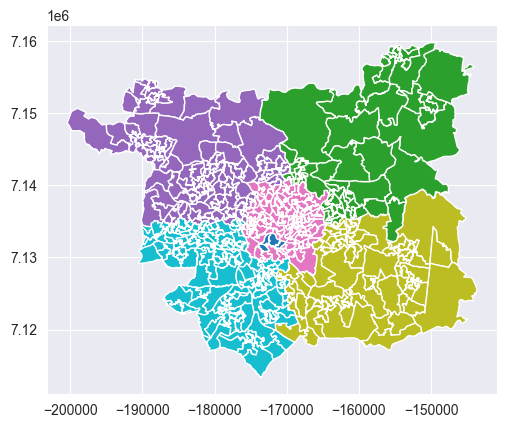

In [7]:
#plot zones based on region
zones.plot(column = zones["Region"])

### 2. Data exploration: discover and visualise mobility patterns. [3 pnt]
#### 2.1 For each zone, count the number of times that zone is a destination (hint: use the pandas *groupby* method). Create a visualisation showing the statistical distribution of these counts, using a histogram. What can you say about this distribution?

In [8]:
smallzones = zones[[ "dest_zone", "Region"]].copy()
display(smallzones)

,dest_zone,Region
0,E01011466,SW
1,E01011467,SW
2,E01011468,SE
3,E01011469,SE
4,E01011470,SE
...,...,...
477,E01033031,R
478,E01033032,R
479,E01033033,R
480,E01033034,R


In [9]:
display(datatest)

,ID,purpose,n_car,n_bicycle,n_motorcycle,avail_car,avail_taxi,avail_bus,avail_rail,avail_cycling,avail_walking,total_car_cost,taxi_cost,day_of_the_week_start,city.leeds,city.westyorkshire,city.elsewhereuk,city.na,female,age,british_origin,o_level,a_level,voc_qual,masters,phd,occ,occ_full_time,nb_hh_employed,mar,hh_size,income_perso,car_distance_km,bus_distance_km,rail_distance_km,taxi_distance_km,cycling_distance_km,walking_distance_km,car_travel_time_min,bus_travel_time_min,rail_travel_time_min,taxi_travel_time_min,cycling_travel_time_min,walking_travel_time_min,bus_IVT_time_min,bus_access_egress_time_min,rail_IVT_time_min,rail_access_egress_time_min,choice,bus_transfers,rail_transfers,income_hh,bus_cost_total_per_leg,rail_cost_total_per_leg,Origin_lsoa_code,Origin_lsoa_name,Destination_lsoa_code,Destination_lsoa_name
0,1,Primary Workplace,1,1,0,1,1,1,1,0,0,3.669,21.893,Wednesday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,26.595,22.278,22.592,26.595,21.388,17.630,61.000000,80.016667,40.766667,61.000000,66.366667,221.066667,61.750000,2.550000,21.000000,15.766667,3,2.0,1.0,6,2.071233,4.065478,NaN,NaN,E01033010,Leeds 111B
2,1,Primary Workplace,1,1,0,1,1,1,1,0,0,6.677,17.132,Thursday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,19.681,19.692,23.318,19.681,21.608,17.377,47.350000,82.800000,64.066667,47.350000,68.483333,218.833333,58.966667,5.083333,19.000000,22.066667,3,1.0,1.0,6,0.517808,2.710319,NaN,NaN,E01033010,Leeds 111B
3,1,Errands without Appointment,1,1,0,0,0,1,0,0,1,0.464,3.559,Thursday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,0.861,0.627,0.627,0.861,0.675,0.627,4.216667,6.833333,0.000000,4.216667,3.450000,8.066667,1.000000,5.833333,0.000000,0.000000,6,0.0,0.0,6,0.517808,0.000000,E01033010,Leeds 111B,E01033010,Leeds 111B
11,1,Primary Workplace,1,1,0,0,1,1,1,0,0,9.261,17.341,Monday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,21.056,17.692,18.700,21.056,21.727,17.429,42.866667,62.450000,30.466667,42.866667,69.016667,219.566667,55.233333,7.216667,15.000000,15.466667,3,0.0,0.0,6,0.414247,2.710319,NaN,NaN,E01033010,Leeds 111B
12,1,Grocery,1,1,0,0,1,1,0,0,1,0.589,5.382,Monday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,2.842,1.026,0.934,2.842,1.221,0.934,12.600000,8.816667,0.000000,12.600000,4.166667,11.300000,2.000000,6.816667,0.000000,0.000000,6,0.0,0.0,6,0.414247,0.000000,E01033010,Leeds 111B,E01033010,Leeds 111B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10092,431,Home,0,0,0,0,1,1,0,0,1,0.346,4.572,Sunday,0,0,1,0,1,2,1,1,1,0,0,0,13,0,1,1,2,1,2.244,1.948,1.948,2.244,1.913,1.705,7.533333,10.900000,10.900000,7.533333,7.150000,22.516667,7.000000,3.650000,7.000000,3.650000,6,0.0,0.0,4,1.500000,1.500000,E01033010,Leeds 111B,E01011671,Leeds 055B
10093,431,Errand Other,0,0,0,0,1,0,0,0,1,0.316,4.466,Monday,0,0,1,0,1,2,1,1,1,0,0,0,13,0,1,1,2,1,2.227,1.523,1.523,2.227,1.829,1.523,6.583333,0.000000,0.000000,6.583333,8.866667,20.583333,0.000000,0.000000,0.000000,0.000000,6,0.0,0.0,4,0.000000,0.000000,E01011671,Leeds 055B,E01011678,Leeds 063B
10094,431,Errand Other,0,0,0,0,1,0,0,0,1,0.311,4.468,Wednesday,0,0,1,0,1,2,1,1,1,0,0,0,13,0,1,1,2,1,2.178,1.330,1.330,2.178,2.048,1.330,6.833333,0.000000,0.000000,6.833333,8.750000,18.100000,0.000000,0.000000,0.000000,0.000000,6,0.0,0.0,4,0.000000,0.000000,E01033005,Leeds 055H,E01011678,Leeds 063B
10098,432,Work Related,2,1,0,1,1,1,1,0,0,6.158,14.484,Monday,0,0,1,0,1,4,1,1,1,0,0,0,4,1,1,2,4,5,19.506,18.966,19.989,19.506,20.458,18.118,22.350000,65.900000,42.533333,22.350000,69.700000,225.516667,53.616667,2.283333,26.183333,8.216667,1,2.0,1.0,7,7.200000,17.100000,NaN,NaN,E01033016,Leeds 111E


In [10]:
DataRegion = datatest.merge(smallzones, left_on="Destination_lsoa_code", right_on="dest_zone")
display(DataRegion)

,ID,purpose,n_car,n_bicycle,n_motorcycle,avail_car,avail_taxi,avail_bus,avail_rail,avail_cycling,avail_walking,total_car_cost,taxi_cost,day_of_the_week_start,city.leeds,city.westyorkshire,city.elsewhereuk,city.na,female,age,british_origin,o_level,a_level,voc_qual,masters,phd,occ,occ_full_time,nb_hh_employed,mar,hh_size,income_perso,car_distance_km,bus_distance_km,rail_distance_km,taxi_distance_km,cycling_distance_km,walking_distance_km,car_travel_time_min,bus_travel_time_min,rail_travel_time_min,taxi_travel_time_min,cycling_travel_time_min,walking_travel_time_min,bus_IVT_time_min,bus_access_egress_time_min,rail_IVT_time_min,rail_access_egress_time_min,choice,bus_transfers,rail_transfers,income_hh,bus_cost_total_per_leg,rail_cost_total_per_leg,Origin_lsoa_code,Origin_lsoa_name,Destination_lsoa_code,Destination_lsoa_name,dest_zone,Region
0,1,Primary Workplace,1,1,0,1,1,1,1,0,0,3.669,21.893,Wednesday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,26.595,22.278,22.592,26.595,21.388,17.630,61.000000,80.016667,40.766667,61.000000,66.366667,221.066667,61.750000,2.550000,21.00,15.766667,3,2.0,1.0,6,2.071233,4.065478,NaN,NaN,E01033010,Leeds 111B,E01033010,C
1,1,Primary Workplace,1,1,0,1,1,1,1,0,0,6.677,17.132,Thursday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,19.681,19.692,23.318,19.681,21.608,17.377,47.350000,82.800000,64.066667,47.350000,68.483333,218.833333,58.966667,5.083333,19.00,22.066667,3,1.0,1.0,6,0.517808,2.710319,NaN,NaN,E01033010,Leeds 111B,E01033010,C
2,1,Errands without Appointment,1,1,0,0,0,1,0,0,1,0.464,3.559,Thursday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,0.861,0.627,0.627,0.861,0.675,0.627,4.216667,6.833333,0.000000,4.216667,3.450000,8.066667,1.000000,5.833333,0.00,0.000000,6,0.0,0.0,6,0.517808,0.000000,E01033010,Leeds 111B,E01033010,Leeds 111B,E01033010,C
3,1,Primary Workplace,1,1,0,0,1,1,1,0,0,9.261,17.341,Monday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,21.056,17.692,18.700,21.056,21.727,17.429,42.866667,62.450000,30.466667,42.866667,69.016667,219.566667,55.233333,7.216667,15.00,15.466667,3,0.0,0.0,6,0.414247,2.710319,NaN,NaN,E01033010,Leeds 111B,E01033010,C
4,1,Grocery,1,1,0,0,1,1,0,0,1,0.589,5.382,Monday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,2.842,1.026,0.934,2.842,1.221,0.934,12.600000,8.816667,0.000000,12.600000,4.166667,11.300000,2.000000,6.816667,0.00,0.000000,6,0.0,0.0,6,0.414247,0.000000,E01033010,Leeds 111B,E01033010,Leeds 111B,E01033010,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,409,Home,1,1,0,0,1,1,1,1,0,1.246,10.999,Thursday,1,0,0,0,0,5,1,1,0,1,0,0,4,1,2,3,4,3,9.717,9.530,11.059,9.717,8.374,8.032,34.783333,47.516667,38.800000,34.783333,35.233333,107.166667,38.483333,9.016667,13.00,25.783333,5,0.0,0.0,3,3.000000,4.500000,E01033010,Leeds 111B,E01011388,Leeds 019B,E01011388,NW
7019,409,Home,1,1,0,0,1,1,1,1,0,1.251,10.538,Friday,1,0,0,0,0,5,1,1,0,1,0,0,4,1,2,3,4,3,9.750,7.973,11.080,9.750,8.133,8.012,30.133333,39.850000,39.016667,30.133333,35.083333,106.883333,29.533333,10.300000,13.00,26.016667,5,0.0,0.0,3,2.300000,4.500000,E01033010,Leeds 111B,E01011388,Leeds 019B,E01011388,NW
7020,424,Work Related,1,0,0,1,1,1,0,0,1,0.281,4.343,Thursday,1,0,0,0,1,4,1,1,1,1,0,0,7,1,1,2,1,3,2.052,1.829,1.829,2.052,1.887,1.682,6.216667,16.366667,16.366667,6.216667,8.433333,22.283333,2.750000,13.600000,2.75,13.600000,1,0.0,0.0,4,1.500000,1.500000,E01033035,Leeds 064F,E01011618,Leeds 070C,E01011618,R
7021,424,Work Related,1,0,0,1,1,1,0,0,1,0.284,4.365,Thursday,1,0,0,0,1,4,1,1,1,1,0,0,7,1,1,2,1,3,2.073,1.806,1.806,2.073,1.822,1.659,6.333333,15.166667,15.166667,6.333333,8.250000,21.983333,1.850000,13.300000,1.85,13.300000,1,0.0,0.0,4,1.500000,1.500000,E01033035,Leeds 064F,E01011618,Leeds 070C,E01011618,R


,Region
Region,
C,1445
NE,350
NW,1180
R,2180
SE,706
SW,1162


<Axes: xlabel='Region', ylabel='Count'>

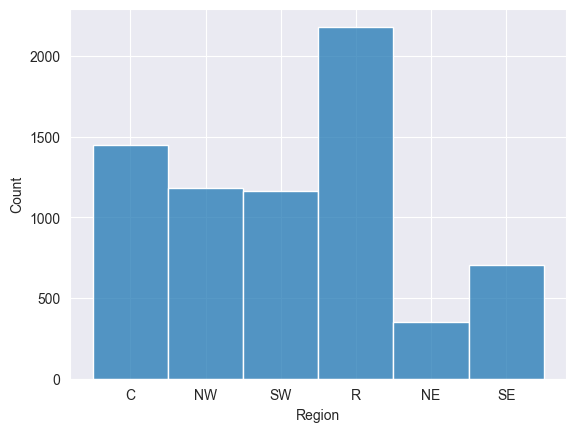

In [11]:
histogram = DataRegion.groupby(['Region'])['Region'].count()
histogram = histogram.to_frame()
display(histogram)
sns.histplot(data=DataRegion["Region"])

#### 2.2 Visualise the spatial distribution of these counts. To do so, merge this count dataframe with the geographic delination of zones (thus, geospatial data). The counts are heavily skewed. Therefore, try different levels of the upper boundary of the color scale (vmax), and set it to an appropriate level.

In [12]:
histogram = histogram.rename(columns = {"Region": "Trips"})
zones = zones.merge(histogram, on="Region")
display(zones)

,dest_zone,LSOA11NM,Region,car,bus,rail,taxi,cycling,walking,geometry,Trips
0,E01011466,Leeds 094A,SW,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"MULTIPOLYGON (((-169221.389 7124159.332, -1692...",1162
1,E01011467,Leeds 112A,SW,0.744681,0.106383,0.000000,0.000000,0.127660,0.021277,"MULTIPOLYGON (((-169723.032 7129853.761, -1696...",1162
2,E01011471,Leeds 092A,SW,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"MULTIPOLYGON (((-170855.103 7127672.325, -1708...",1162
3,E01011472,Leeds 092B,SW,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"MULTIPOLYGON (((-170242.159 7127357.602, -1702...",1162
4,E01011473,Leeds 092C,SW,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"MULTIPOLYGON (((-170273.014 7126293.807, -1702...",1162
...,...,...,...,...,...,...,...,...,...,...,...
477,E01011707,Leeds 005A,NE,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"MULTIPOLYGON (((-151458.863 7153272.283, -1514...",350
478,E01033008,Leeds 111A,C,0.168196,0.253823,0.116208,0.039755,0.039755,0.382263,"MULTIPOLYGON (((-172219.109 7133112.782, -1722...",1445
479,E01033010,Leeds 111B,C,0.141117,0.222335,0.054822,0.033503,0.026396,0.521827,"MULTIPOLYGON (((-171548.164 7133073.045, -1715...",1445
480,E01033011,Leeds 111C,C,0.233645,0.280374,0.018692,0.046729,0.000000,0.420561,"MULTIPOLYGON (((-170104.789 7132122.236, -1700...",1445


<Axes: >

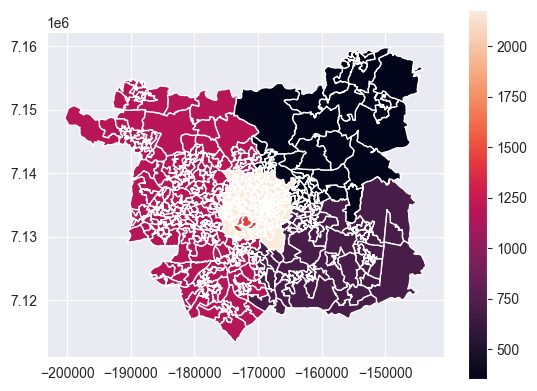

In [13]:
zones.plot(column = zones["Trips"], legend=True)

### 3. Model training: Train an MLP to predict the mode choices for trips [3 pnt]

#### 3.1. Use the *numerical travel features* (see notes above) and the following two categorical features: purpose and destination regions. Remember: (1) to scale all variables appropriately before training your MLP, and (2) to encode categorical variables.  (hint: use the pandas **get_dummies** method to encode the categorical variables)

In [14]:
features = ['avail_car', 'avail_taxi', 'avail_bus', 'avail_rail', 'avail_cycling', 'avail_walking', 'total_car_cost', 'taxi_cost', 'bus_cost_total_per_leg', 'rail_cost_total_per_leg', 'car_distance_km', 'bus_distance_km', 'rail_distance_km', 'taxi_distance_km', 'cycling_distance_km', 'walking_distance_km', 'car_travel_time_min', 'bus_travel_time_min', 'rail_travel_time_min', 'taxi_travel_time_min', 'cycling_travel_time_min', 'walking_travel_time_min','bus_IVT_time_min', 'bus_access_egress_time_min', 'rail_IVT_time_min', 'rail_access_egress_time_min', 'bus_transfers', 'rail_transfers', "purpose", "Region"]

X = DataRegion.loc[:,features]
X = pd.get_dummies(X)
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
Y = DataRegion["choice"]


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state = 12345, test_size = 0.4)

In [16]:
layers = (10)
n_iter_no_change = 10
mlp = MLPClassifier(hidden_layer_sizes = layers, solver='adam', learning_rate_init = 0.001, alpha=0.1, batch_size=250, activation = 'tanh', max_iter = 2000, early_stopping=True, n_iter_no_change = n_iter_no_change,validation_fraction = 0.25)

# Train the MLP using the train data
mlp.fit(X_train, Y_train)

MLPClassifier(activation='tanh', alpha=0.1, batch_size=250, early_stopping=True,
              hidden_layer_sizes=10, max_iter=2000, validation_fraction=0.25)

Text(0.5, 1.0, 'Cross entropy loss on the TRAINING DATA. \n Best CE = 0.396')

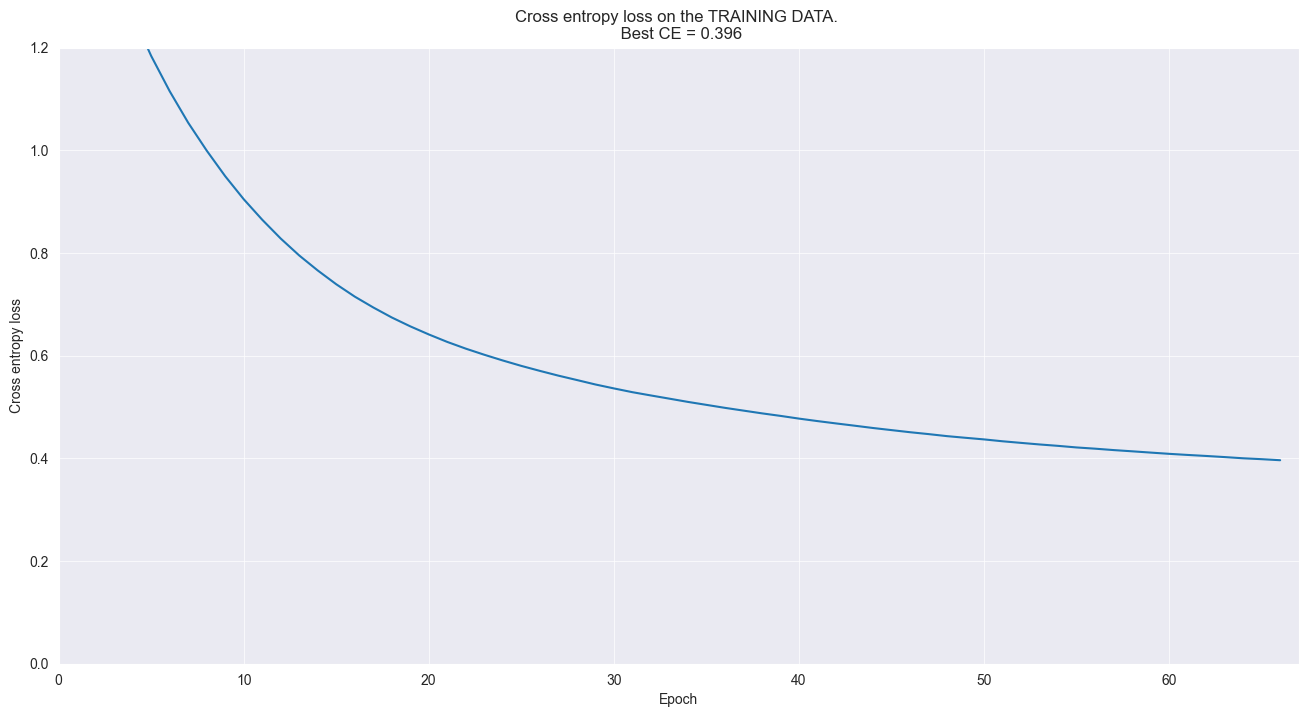

In [17]:
mlp.fit(X_train, Y_train)
fig, ax = plt.subplots(figsize = (16,8))
plt.plot(mlp.loss_curve_)
ax.set_xlabel('Epoch')
ax.set_ylabel('Cross entropy loss')
ax.grid(True,linewidth = 0.5)
ax.set_ylim(0.0,1.2)
ax.set_xlim(0,mlp.n_iter_)
ax.set_title(f'Cross entropy loss on the TRAINING DATA. \n Best CE = {mlp.loss_:4.3f}')

In [18]:
def calculate_acc_ce(mlp,X_train,Y_train,X_test, Y_test):

    def calculate_acc(mlp,X,Y):
        accuracy = mlp.score(X,Y)
        return accuracy

    def calculate_ce(mlp,X,Y):
        # Compute cross entropy
        # Use the model object to predict probabilities per class
        prob = mlp.predict_proba(X)

        # Multiply the probabilities with Y (0/1 array), and sum along the row axis to obtain the predicted probability of the target
        Y_dummy = pd.get_dummies(Y).to_numpy()
        prob_chosen = np.sum(prob*Y_dummy,axis=1)

        # Take the logarithm
        log_prob_chosen = np.log(prob_chosen)

        # Compute the cross entropy
        cross_entropy = -np.sum(log_prob_chosen)/len(Y)
        return cross_entropy

    # Compute the accuracy
    acc_train = calculate_acc(mlp,X_train,Y_train)
    acc_test  = calculate_acc(mlp,X_test,Y_test)

    # Apply cross entropy function
    ce_train = calculate_ce(mlp,X_train,Y_train)
    ce_test = calculate_ce(mlp,X_test,Y_test)
    return acc_train, acc_test, ce_train, ce_test

In [19]:
# Apply our evaluation function
accuracy_train, accuracy_test, cross_entropy_train, cross_entropy_test = calculate_acc_ce(mlp,X_train,Y_train,X_test, Y_test)

# Print the results
print('\t\t\t Train set\t Test set')
print(f'Accuracy\t\t {accuracy_train:0.3f}\t\t {accuracy_test:0.3f}')
print(f'Cross entropy\t {cross_entropy_train:0.3f}\t\t {cross_entropy_test:0.3f}')

			 Train set	 Test set
Accuracy		 0.871		 0.848
Cross entropy	 0.414		 0.460


#### 3.2 Tune the hyperparameters of your MLP. That is, do a gridsearch over the following hyperparameter space:
        - Architecture: {1 HL w/30 nodes, 2 HL w/ 5 nodes}
        - Alpha parameter: {1, 0.1}
        - Learning rate: {0.01, 0.001}

In [20]:
# Create MLP object (plain vanilla MLP)
mlp_gs = MLPClassifier(activation='tanh', solver='adam', batch_size=250, max_iter=2000)

# Define the hyperparameter search space
# 'hidden_layer_sizes' defines the number of nodes and layers
# 'alpha' governs the L2 regularisation
# 'learning_rate_init' governs the learning rate.
hyperparameter_space = {
    'hidden_layer_sizes': [(1, 30), (2, 5)],
    'alpha': [1, 0.1],
    'learning_rate_init': [0.01, 0.001]}

# Create scoring function
logloss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

# Create the grid_search object, with using the MLP classifier
folds = 5  # Number of cross validation splits
mlp_gridsearch = GridSearchCV(mlp_gs, hyperparameter_space, n_jobs=-1, cv=folds, scoring=logloss)

In [21]:
# if the model RF_gridsearch.pickle does not exist, conduct the gridsearch, else load the grid_search object
if not Path('data/mlp_gridsearch.pickle').exists():

    # Execute the training/gridsearch
    # Note that this is computationally expensive!
    # It may take up to 5 minutes, since 3 x 3 x 3 = 27 models need to be trained, each with 5 folds (=135)
    mlp_gridsearch.fit(X_train, Y_train)

    # Save the trained grid_search object
    with open('data/mlp_gridsearch.pickle', 'wb') as f:
        pickle.dump(mlp_gridsearch, f)
else:
    # Load the trained grid_search object
    with open('data/mlp_gridsearch.pickle', 'rb') as f:
        mlp_gridsearch = pickle.load(f)

# Print the best parameters
print('Best parameters:')
print(f'Tuned hyperparameters:\n{mlp_gridsearch.best_params_}')
print(f'Mean Squared Error:\t{(-mlp_gridsearch.best_score_):0.3f}')

Best parameters:
Tuned hyperparameters:
{'alpha': 0.1, 'hidden_layer_sizes': (2, 5), 'learning_rate_init': 0.001}
Mean Squared Error:	0.521


#### 3.3 Fit a MLP model, using the optimal hyperparameters found and report and interpret the following output metrics:
        - Accuracy
        - Cross-entropy
        - Confusion matrix

In [22]:
#sets the optimal parameters from the last exercise
layers = (2,5)
alf = 0.1
lri = 0.001
n_iter_no_change = 10
mlp = MLPClassifier(hidden_layer_sizes = layers, solver='adam', learning_rate_init = lri, alpha=alf, batch_size=250, activation = 'tanh', max_iter = 2000, early_stopping=True, n_iter_no_change = n_iter_no_change,validation_fraction = 0.25, random_state= 2021)

# Train the MLP using the train data
mlp.fit(X_train, Y_train)

MLPClassifier(activation='tanh', alpha=0.1, batch_size=250, early_stopping=True,
              hidden_layer_sizes=(2, 5), max_iter=2000, random_state=2021,
              validation_fraction=0.25)

In [23]:
# Apply our evaluation function
accuracy_train, accuracy_test, cross_entropy_train, cross_entropy_test = calculate_acc_ce(mlp,X_train,Y_train,X_test, Y_test)

# Print the results
print('\t\t\t Train set\t Test set')
print(f'Accuracy\t\t {accuracy_train:0.3f}\t\t {accuracy_test:0.3f}')
print(f'Cross entropy\t {cross_entropy_train:0.3f}\t\t {cross_entropy_test:0.3f}')

			 Train set	 Test set
Accuracy		 0.820		 0.799
Cross entropy	 0.628		 0.660


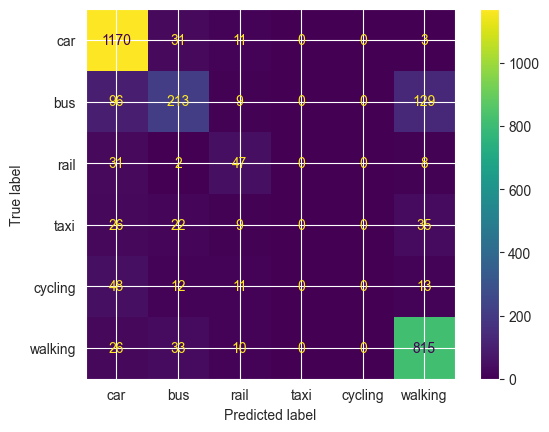

In [24]:
# Predict the choices for the test data set, using the MLP trained with early stopping and MLP with hyperparameters tuned
Y_pred_early_st  = mlp.predict(X_test)
labels = ["car", "bus", "rail", "taxi", "cycling", "walking"]
# Show the confusion matrices, to compare the hyperparameter tuned network with the early stopping network and showing the labels of transit method
cm1 = ConfusionMatrixDisplay.from_predictions(y_true=Y_test,y_pred=Y_pred_early_st, normalize=None, display_labels=labels)


### 4.Assess the impact of a cordon pricing policy on mode shares [3 pnt]
#### 4.1. Benchmark scenario: create a new dataframe containing only trips with a destination in region C (the city centre). Predict the mode shares for these trips, using your trained model. Hint: use the *predict_proba* function from sk-learn (why should you NOT use the *predict* function in this case?)

In [25]:
#makes a dataset for central trips
CenterTrips = DataRegion.loc[DataRegion['Region'] == "C"]
display(CenterTrips)

,ID,purpose,n_car,n_bicycle,n_motorcycle,avail_car,avail_taxi,avail_bus,avail_rail,avail_cycling,avail_walking,total_car_cost,taxi_cost,day_of_the_week_start,city.leeds,city.westyorkshire,city.elsewhereuk,city.na,female,age,british_origin,o_level,a_level,voc_qual,masters,phd,occ,occ_full_time,nb_hh_employed,mar,hh_size,income_perso,car_distance_km,bus_distance_km,rail_distance_km,taxi_distance_km,cycling_distance_km,walking_distance_km,car_travel_time_min,bus_travel_time_min,rail_travel_time_min,taxi_travel_time_min,cycling_travel_time_min,walking_travel_time_min,bus_IVT_time_min,bus_access_egress_time_min,rail_IVT_time_min,rail_access_egress_time_min,choice,bus_transfers,rail_transfers,income_hh,bus_cost_total_per_leg,rail_cost_total_per_leg,Origin_lsoa_code,Origin_lsoa_name,Destination_lsoa_code,Destination_lsoa_name,dest_zone,Region
0,1,Primary Workplace,1,1,0,1,1,1,1,0,0,3.669,21.893,Wednesday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,26.595,22.278,22.592,26.595,21.388,17.630,61.000000,80.016667,40.766667,61.000000,66.366667,221.066667,61.750000,2.550000,21.000000,15.766667,3,2.0,1.0,6,2.071233,4.065478,NaN,NaN,E01033010,Leeds 111B,E01033010,C
1,1,Primary Workplace,1,1,0,1,1,1,1,0,0,6.677,17.132,Thursday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,19.681,19.692,23.318,19.681,21.608,17.377,47.350000,82.800000,64.066667,47.350000,68.483333,218.833333,58.966667,5.083333,19.000000,22.066667,3,1.0,1.0,6,0.517808,2.710319,NaN,NaN,E01033010,Leeds 111B,E01033010,C
2,1,Errands without Appointment,1,1,0,0,0,1,0,0,1,0.464,3.559,Thursday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,0.861,0.627,0.627,0.861,0.675,0.627,4.216667,6.833333,0.000000,4.216667,3.450000,8.066667,1.000000,5.833333,0.000000,0.000000,6,0.0,0.0,6,0.517808,0.000000,E01033010,Leeds 111B,E01033010,Leeds 111B,E01033010,C
3,1,Primary Workplace,1,1,0,0,1,1,1,0,0,9.261,17.341,Monday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,21.056,17.692,18.700,21.056,21.727,17.429,42.866667,62.450000,30.466667,42.866667,69.016667,219.566667,55.233333,7.216667,15.000000,15.466667,3,0.0,0.0,6,0.414247,2.710319,NaN,NaN,E01033010,Leeds 111B,E01033010,C
4,1,Grocery,1,1,0,0,1,1,0,0,1,0.589,5.382,Monday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,2.842,1.026,0.934,2.842,1.221,0.934,12.600000,8.816667,0.000000,12.600000,4.166667,11.300000,2.000000,6.816667,0.000000,0.000000,6,0.0,0.0,6,0.414247,0.000000,E01033010,Leeds 111B,E01033010,Leeds 111B,E01033010,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,396,Dropoff K12,1,1,0,1,1,1,1,1,0,3.065,8.583,Sunday,1,0,0,0,1,5,1,1,1,1,0,0,8,1,1,1,2,3,8.973,9.482,11.610,8.973,10.527,8.616,14.750000,31.816667,36.150000,14.750000,35.933333,109.766667,23.233333,8.000000,10.000000,26.150000,1,0.0,0.0,3,3.000000,4.500000,E01011635,Leeds 097B,E01033011,Leeds 111C,E01033011,C
2331,400,Social,0,0,0,0,1,1,0,0,0,1.094,7.155,Monday,1,0,0,0,1,2,1,1,0,0,0,0,14,0,1,3,2,1,6.393,3.723,3.723,6.393,4.002,3.494,13.050000,16.833333,16.833333,13.050000,11.300000,42.333333,8.183333,8.633333,8.183333,8.633333,2,0.0,0.0,2,2.300000,2.300000,E01011293,Leeds 071C,E01033011,Leeds 111C,E01033011,C
2332,416,Home,0,0,0,0,1,1,0,0,1,0.229,3.882,Thursday,1,0,0,0,1,4,0,1,1,1,1,0,1,0,0,2,1,12,1.194,1.089,0.992,1.194,1.202,0.992,5.783333,7.716667,0.000000,5.783333,4.266667,11.333333,3.166667,4.250000,0.000000,0.000000,6,0.0,0.0,12,1.500000,0.000000,E01033010,Leeds 111B,E01033011,Leeds 111C,E01033011,C
2333,416,Errands without Appointment,0,0,0,0,1,1,0,0,1,0.687,4.134,Thursday,1,0,0,0,1,4,0,1,1,1,1,0,1,0,0,2,1,12,1.738,1.058,0.839,1.738,1.109,0.839,5.666667,10.083333,0.000000,5.666667,4.400000,10.483333,1.933333,7.883333,0.000000,0.000000,6,0.0,0.0,12,1.500000,0.000000,E01033018,Leeds 112D,E01033011,Leeds 111C,E01033011,C


In [26]:
#predicts  the trips
Xcenter = X.loc[DataRegion['Region'] == "C"]
X_scaled = scaler.transform(Xcenter)
normal = mlp.predict_proba(X_scaled)

In [27]:
#displays the percentateges
percentages = normal.sum(axis = 0)/ normal.sum()
display(percentages)

array([0.19880141, 0.17794419, 0.04421589, 0.06274107, 0.02868513,
       0.48761231])

#### 4.2. Cordon pricing policy: Create a new dataframe for the cordon pricing. To do so, copy the dataframe created in 4.1. Increase `total_car_cost` and `taxi_cost` by £10. Use your trained model to predict the modes. (**Remember to scale the data with the scaler created for training the model**).


In [28]:
#creates the policy data set
Xpolicy = Xcenter
Xpolicy["total_car_cost"] = Xpolicy["total_car_cost"]+ 10
Xpolicy.taxi_cost = Xpolicy.taxi_cost + 10

#scales the data for model use
X_scaled = scaler.transform(Xpolicy)
policy = mlp.predict_proba(X_scaled)

C:\Users\Alex\AppData\Local\Temp\ipykernel_3612\1418381401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xpolicy["total_car_cost"] = Xpolicy["total_car_cost"]+ 10
C:\Users\Alex\AppData\Local\Temp\ipykernel_3612\1418381401.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xpolicy.taxi_cost = Xpolicy.taxi_cost + 10


#### 4.3. Compare your results. That is, analyse how the aggregate mode shares have changed as a result of the cordon pricing policy. Create a visualisation representing the shift in mode shares. By which mode have car trips most often been substituted?

In [29]:
#calculates amount of trips would be geuesed.
normal.sum(axis = 0)

array([287.26803657, 257.12935886,  63.89196229,  90.66083949,
        41.45000896, 704.59979382])

In [30]:
#calculates amount of trips would be geuesed.
policy.sum(axis = 0)

array([184.36547898, 171.10450841, 134.94717744, 107.85183701,
        60.53544523, 786.19555292])

0: car, 1: bus, 2: rail, 3: taxi, 4:
cycling, 5: walking

([<matplotlib.patches.Wedge at 0x184147d7e50>,
 [Text(0.8923469965993135, 0.6432082381781075, 'car'),
  Text(-0.2586276700936359, 1.0691640324393341, 'bus'),
  Text(-0.8852382452253581, 0.6529573103889172, 'rail'),
  Text(-1.0510303891536692, 0.3245537260231142, 'taxi'),
  Text(-1.0999170245622916, 0.013510702351668225, 'cycling'),
  Text(0.04279803994746644, -1.099167106393134, 'walking')])

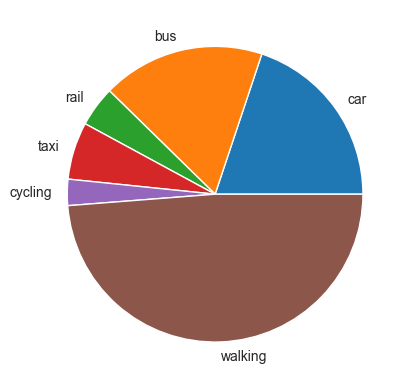

In [31]:
#makes the labels and plots a piechart
pielabels = ["car", "bus", "rail","taxi", "cycling", "walking"]
plt.pie(normal.sum(axis = 0), labels = pielabels)

([<matplotlib.patches.Wedge at 0x1840e805c90>,
 [Text(1.012810641298831, 0.4292022889871987, 'car'),
  Text(0.4254539184078299, 1.0143909321910483, 'bus'),
  Text(-0.29155689019525755, 1.0606576166603767, 'rail'),
  Text(-0.7861198741408929, 0.7694254632391021, 'taxi'),
  Text(-1.009457367221109, 0.437030689726737, 'cycling'),
  Text(-0.1518430500969142, -1.0894694525948243, 'walking')])

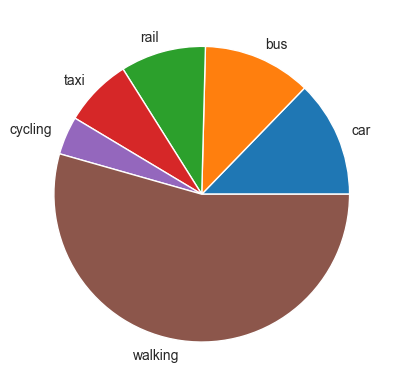

In [32]:
#makes the policy pie chart
plt.pie(policy.sum(axis = 0), labels = pielabels)

Most of the car trips get changed to walking journeys, this is logical solution for car trips that are easy to change. Taxi increased in this policy scenario likely because some car trips that became expensive for car trips got replaced with taxi trips, because some places you likely need to go with car.

#### 4.3.Reflect on your analysis: <br> 
`A` Reflect on your results. Are the results plausible? Explain your answer? <br> 
`B` What are the main limitations of your analysis?

An honest anwser is no. Setting a seed made the results consistent, but in expirimintation without a seed led to results that are almost random.

The limitations are that there may be some variables that don't get taken into consideration because they weren't asked. Like disability. Also like I said the model logical consequences depended on the seed.
